# Cost of Communication for different state-of-the-art modems

In [1]:
%run '00_Imports-and-settings.ipynb'

Numpy Version:		 1.19.0
Pandas Version:		 1.0.5
Matplotlib Version:	 3.2.2


In [2]:
df = pd.DataFrame(columns=['worst', 'best'])
df['protocol'] = ['BT5', 'FSK', 'LoRa', 'UMTS']

In [3]:
df = df.set_index('protocol')

In [4]:
display(df)

,worst,best
protocol,,
BT5,NaN,NaN
FSK,NaN,NaN
LoRa,NaN,NaN
UMTS,NaN,NaN


## nRF Bluetooth 5

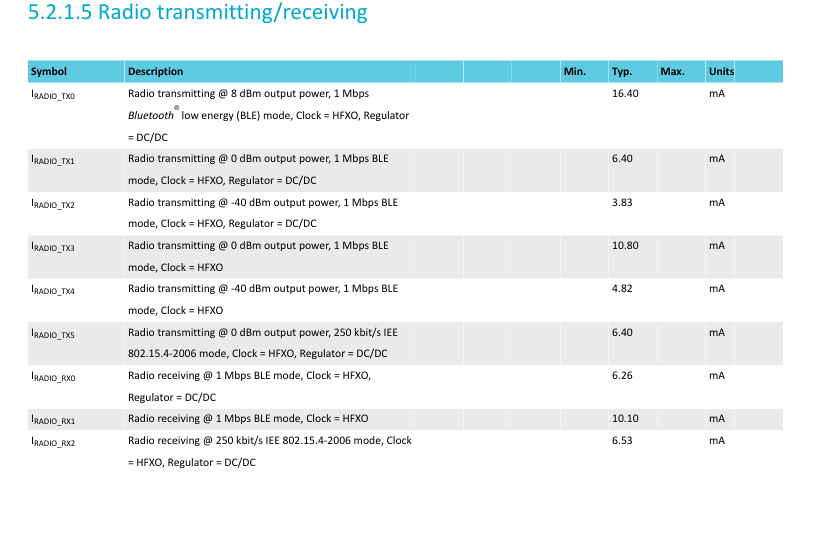

https://infocenter.nordicsemi.com/pdf/nRF52840_PS_v1.1.pdf p58

- 3V  * (4.82 - 16.4) mA -> 0.01446 W - 0.0492W
- with 1Mbps -> 0.024576s

- -> 0,355369mJ
- -> 1.209139 mJ

In [6]:
# energy per bit
df.loc['BT5','worst'] = 3.3 * 16.4 / 1e6
df.loc['BT5', 'best'] = 3.3 * 3.83 / 1e6

## SemTech Lora & FSK

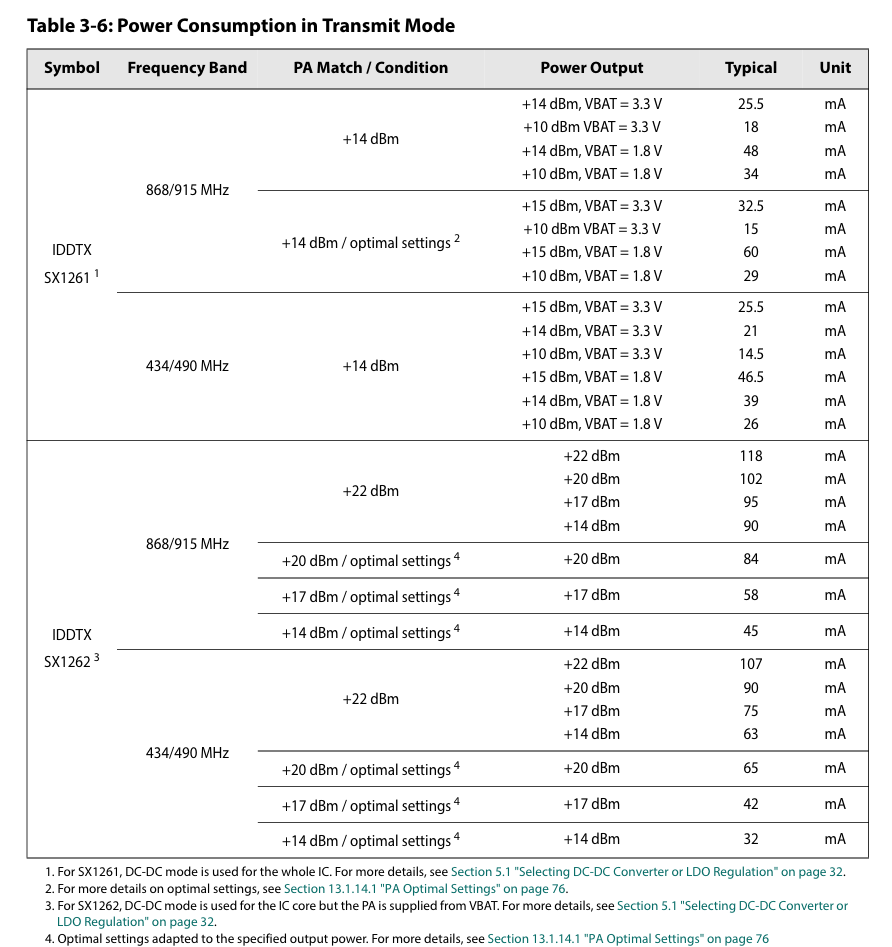

SX1262 | Long Range Low Power LoRa Transceiver
https://www.semtech.com/products/wireless-rf/lora-transceivers/sx1262


- max bit rate
- FSK 300 kb/s  -> 0.08192
- LoRA 62.5 kb/s -> 0.393216
- 14dBm
    - 0.015 - 0.0325 A a 3.3V = 0.10725 W ->
- 22dBm
    - 0.118 a 3.3V = 0.3894 W -> 

- LoRa:
    - best -> .00878592 
    - worst  -> 0.15311831 J
- FSK
    - -> smaller

In [8]:
# energy per bit
df.loc['FSK','worst'] = 3.3 * 118 / 300e3
df.loc['FSK','best'] = 3.3 * 15 / 300e3
df.loc['LoRa', 'worst'] = 3.3 * 118 / 62.5e3
df.loc['LoRa', 'best'] = 3.3 * 15 / 62.5e3

## UMTS

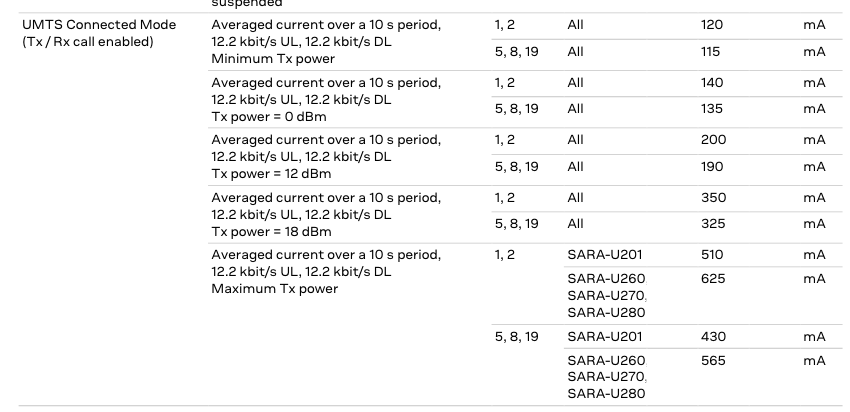

https://www.u-blox.com/sites/default/files/SARA-U2_DataSheet_%28UBX-13005287%29.pdf

- we send 3*32*32 Byte = 24.576 Bit
- 12.2 kbit/s -> 2 s
- (120 - 625 mA) a 3.8 V 
- -> 2.375W -> 4.75 J (worst)
- -> 0.456W -> 0.92J (best)


In [9]:
df.loc['UMTS', 'best'] = 3.8 * 115 / 12.2e3
df.loc['UMTS', 'worst'] = 3.8 * 625 / 12.2e3

## Plot per transmitted bit

In [8]:
display(df)

,worst,best
protocol,,
BT5,5.412e-05,1.2639e-05
FSK,0.001298,0.000165
LoRa,0.0062304,0.000792
UMTS,0.19467213,0.035819672


In [11]:
# our picture is 3*32*32*8 bit
picture_size = 3*32*32*8 / 1e3
print(picture_size)

24.576


In [12]:
t = np.arange(0., 50, 0.5)

In [13]:
print(t)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5]


In [14]:
t * df.loc['BT5', 'worst']

array([0.00000e+00, 2.70600e-05, 5.41200e-05, 8.11800e-05, 1.08240e-04,
       1.35300e-04, 1.62360e-04, 1.89420e-04, 2.16480e-04, 2.43540e-04,
       2.70600e-04, 2.97660e-04, 3.24720e-04, 3.51780e-04, 3.78840e-04,
       4.05900e-04, 4.32960e-04, 4.60020e-04, 4.87080e-04, 5.14140e-04,
       5.41200e-04, 5.68260e-04, 5.95320e-04, 6.22380e-04, 6.49440e-04,
       6.76500e-04, 7.03560e-04, 7.30620e-04, 7.57680e-04, 7.84740e-04,
       8.11800e-04, 8.38860e-04, 8.65920e-04, 8.92980e-04, 9.20040e-04,
       9.47100e-04, 9.74160e-04, 1.00122e-03, 1.02828e-03, 1.05534e-03,
       1.08240e-03, 1.10946e-03, 1.13652e-03, 1.16358e-03, 1.19064e-03,
       1.21770e-03, 1.24476e-03, 1.27182e-03, 1.29888e-03, 1.32594e-03,
       1.35300e-03, 1.38006e-03, 1.40712e-03, 1.43418e-03, 1.46124e-03,
       1.48830e-03, 1.51536e-03, 1.54242e-03, 1.56948e-03, 1.59654e-03,
       1.62360e-03, 1.65066e-03, 1.67772e-03, 1.70478e-03, 1.73184e-03,
       1.75890e-03, 1.78596e-03, 1.81302e-03, 1.84008e-03, 1.867

In [15]:
latencies = pd.DataFrame()
latencies

""


In [16]:
%matplotlib widget

# character 	description
# '-' 	solid line style
# '--' 	dashed line style
# '-.' 	dash-dot line style
# ':' 	dotted line style
# {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
# ls =

# f, ax = plt.subplots(figsize=(6, 4))
f, ax = plt.subplots(figsize=(6, 4))


plt.rc('legend',fontsize=7) # using a size in points
ax.set(yscale="log")
plt.xlabel('Input Size [Kbit]')
plt.ylabel('Energy [mJ]')
plt.style.use(['science','ieee'])

plt.axvline(picture_size, c='black', label='CIFAR-10 image',ls=':')
plt.axvline(picture_size/3, c='grey', label='MNIST image', ls=':')

plt.scatter(x=picture_size, y=98.2, marker='.', s=100, label='ResNet-20')
plt.scatter(x=picture_size/3, y=1.6, marker='x', s=100, label='LeNet5')


sns.color_palette("husl", 8)
ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['BT5', 'best'], label='BT5 best')
ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['BT5', 'worst'], label='BT5 worst')


ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['FSK', 'best'], label='FSK best')
ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['FSK', 'worst'], label='FSK worst')

ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['LoRa', 'best'], label='LoRa best')
ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['LoRa', 'worst'], label='LoRa worst')

ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['UMTS', 'best'], label='UMTS best')
ax = sns.lineplot(ax=ax, x=t, y= 1e3 * t * df.loc['UMTS', 'worst'], label='UMTS worst')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend(frameon=True)

# plt.tight_layout()
filename = 'figures/communication/edge-versus-cloud'
plt.savefig(filename + '.pdf')
tikzplotlib.save(filename + '.tex', axis_width=AXIS_WIDTH, axis_height=AXIS_HEIGHT)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …